In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [32]:
# load data from json file
orig_ds1 = pd.read_json('data/ds1.json')
orig_ds2 = pd.read_json('data/ds2.json')
orig_ds3 = pd.read_json('data/ds3.json')
orig_ds1 = orig_ds1.T
orig_ds2 = orig_ds2.T
orig_ds3 = orig_ds3.T
new_pretrain = pd.read_json('data/pretrain_data.json')
new_exp_train = pd.read_json('data/experiment_bg/train_data.json')
new_exp_test = pd.read_json('data/experiment_bg/test_data.json')

In [33]:
# load the computational data for the new_exp_train and new_exp_test
comp_data = pd.read_csv('selected_data.csv')
comp_data

,mpids,formula,elements,is_stable,theoretical,band_gap,formation_energy_per_atom
0,mp-11107,Ac2O3,"[Element Ac, Element O]",True,False,3.5226,-3.737668
1,mp-32800,Ac2S3,"[Element Ac, Element S]",True,True,2.2962,-2.492486
2,mp-977351,Ac2S3,"[Element Ac, Element S]",False,True,3.0275,-2.439787
3,mp-1183115,AcAlO3,"[Element Ac, Element Al, Element O]",True,True,4.1024,-3.690019
4,mp-1183052,AcBO3,"[Element Ac, Element B, Element O]",False,True,0.8071,-2.475390
...,...,...,...,...,...,...,...
61564,mp-554326,ZrV2O7,"[Element O, Element V, Element Zr]",True,False,2.5909,-2.817253
61565,mp-557686,ZrVF6,"[Element F, Element V, Element Zr]",False,False,2.4073,-3.648452
61566,mp-2713859,ZrZn(SO4)3,"[Element O, Element S, Element Zn, Element Zr]",True,True,4.0187,-2.209007
61567,mp-1093871,ZrZnAu2,"[Element Au, Element Zn, Element Zr]",False,True,0.6956,1.486798


In [34]:
# Add a new row 'bg_comp' to new_exp_train and new_exp_test
comp_data_indexed = comp_data.set_index('mpids')
# Add 'bg_comp' to new_exp_train
new_exp_train.loc['bg_comp'] = new_exp_train.columns.map(
    lambda mpid: comp_data_indexed['band_gap'].get(mpid, float('nan'))
)

# Add 'bg_comp' to new_exp_test
new_exp_test.loc['bg_comp'] = new_exp_test.columns.map(
    lambda mpid: comp_data_indexed['band_gap'].get(mpid, float('nan'))
)
new_pretrain = new_pretrain.T
new_exp_train = new_exp_train.T
new_exp_test = new_exp_test.T
# Check the results
print("new_exp_train after adding 'bg_comp':")
print(new_exp_train.head())

print("new_exp_test after adding 'bg_comp':")
print(new_exp_test.head())

new_exp_train after adding 'bg_comp':
              bg  bg_comp
mp-20078    1.67   1.0749
mp-667338   3.00   2.5064
mp-985592   3.10   2.2955
mp-1192376  0.57   0.6838
mp-2423265  1.00   1.3214
new_exp_test after adding 'bg_comp':
              bg  bg_comp
mp-9770     1.45   0.6102
mp-1195243  1.38   1.2132
mp-29502    2.50   1.8540
mp-1178577  2.44   2.1792
mp-1202506  1.22   0.6250


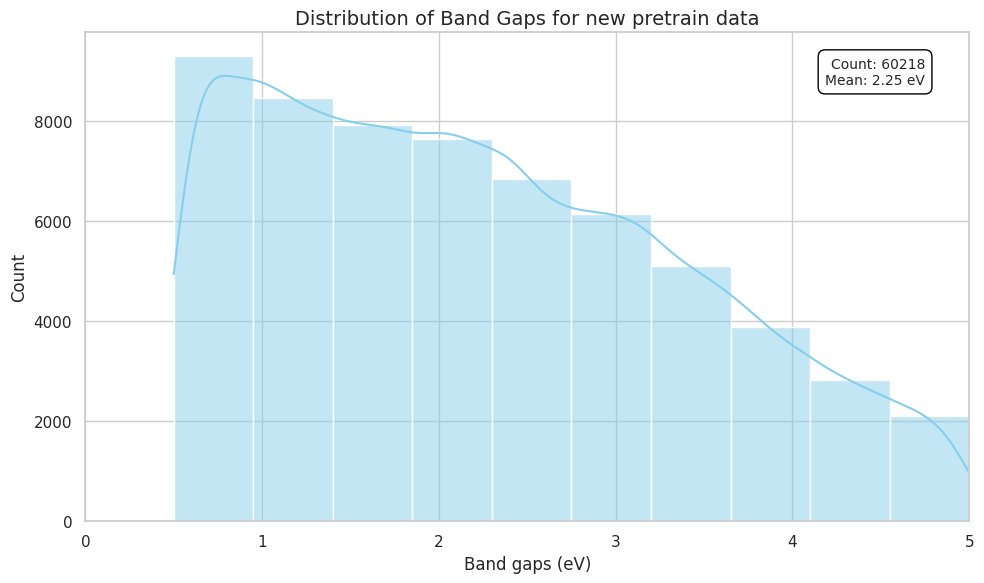

In [35]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Verify that 'bg' exists in new_pretrain
if "bg" not in new_pretrain.columns:
    raise ValueError("'bg' column is missing in new_pretrain.")

# Plot histogram for 'bg' column
plt.figure(figsize=(10, 6))
ax = sns.histplot(new_pretrain["bg"], kde=True, bins=10, color="skyblue")

# Set the title and axis labels
ax.set_title("Distribution of Band Gaps for new pretrain data", fontsize=14)
ax.set_xlim(0, 5)  # Adjust the range as needed
ax.set_xlabel("Band gaps (eV)", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Optional: Add annotations for mean and count
mean_value = new_pretrain["bg"].mean()
count_value = new_pretrain["bg"].count()
ax.text(
    0.95, 0.95,
    f'Count: {int(count_value)}\nMean: {mean_value:.2f} eV',
    verticalalignment='top',
    horizontalalignment='right',
    transform=ax.transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

# Display the plot
plt.tight_layout()
plt.show()

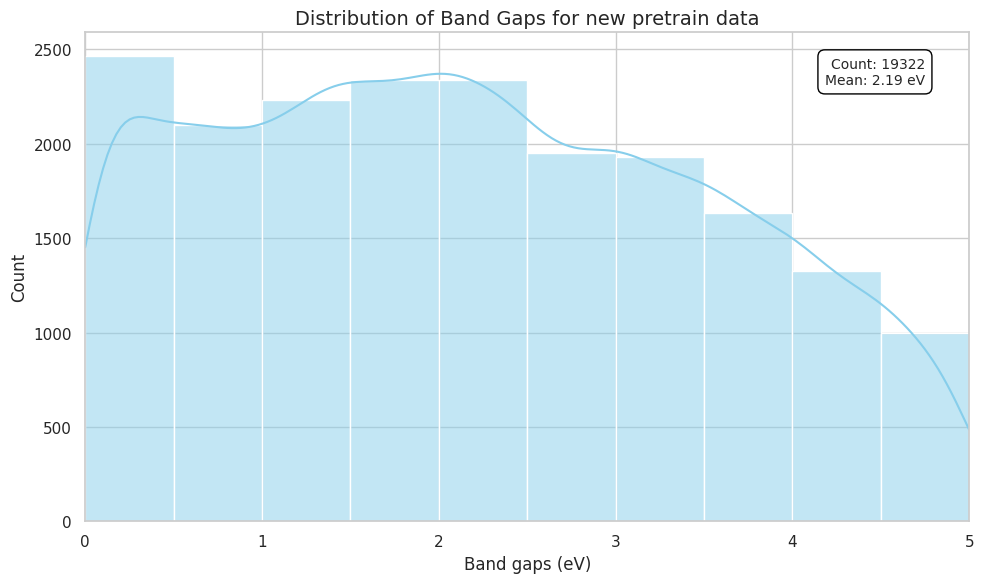

In [36]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Verify that 'bg' exists in new_pretrain
if "bg" not in new_pretrain.columns:
    raise ValueError("'bg' column is missing in new_pretrain.")

# Plot histogram for 'bg' column
plt.figure(figsize=(10, 6))
ax = sns.histplot(orig_ds1["bg"], kde=True, bins=10, color="skyblue")

# Set the title and axis labels
ax.set_title("Distribution of Band Gaps for new pretrain data", fontsize=14)
ax.set_xlim(0, 5)  # Adjust the range as needed
ax.set_xlabel("Band gaps (eV)", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Optional: Add annotations for mean and count
mean_value = orig_ds1["bg"].mean()
count_value = orig_ds1["bg"].count()
ax.text(
    0.95, 0.95,
    f'Count: {int(count_value)}\nMean: {mean_value:.2f} eV',
    verticalalignment='top',
    horizontalalignment='right',
    transform=ax.transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

# Display the plot
plt.tight_layout()
plt.show()

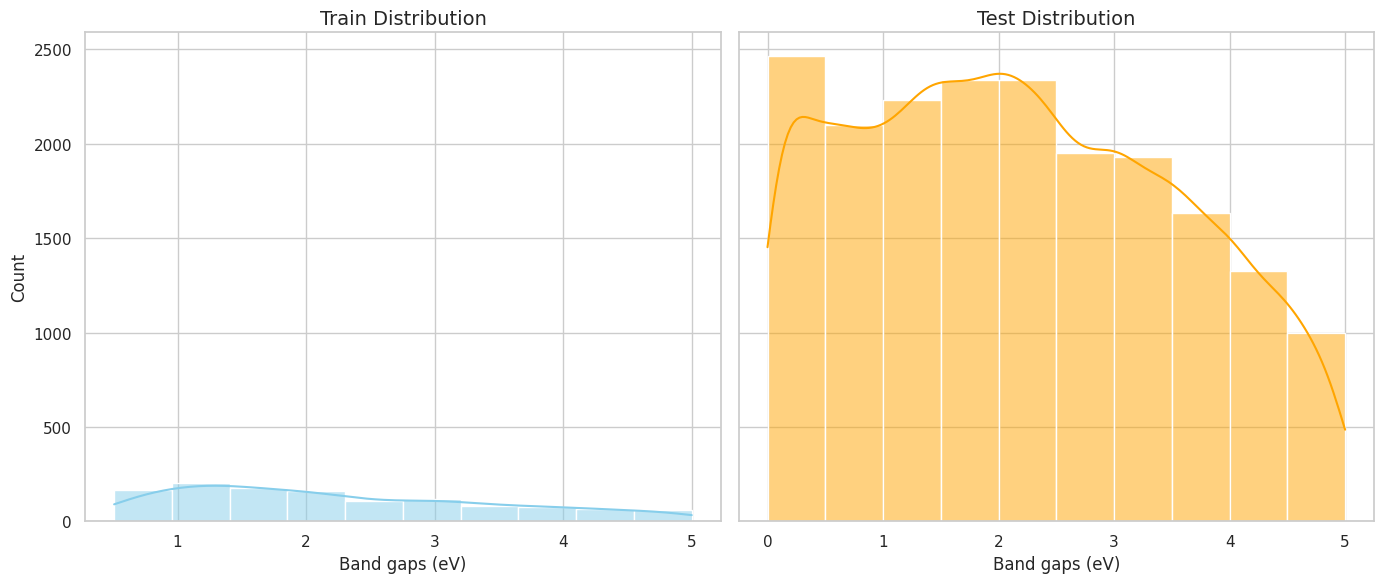

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Example data: Replace `bg_values_1` and `bg_values_2` with your actual data
# bg_values_1 = new_exp_train["bg_comp"].dropna()
# bg_values_2 = orig_ds1["bg"].dropna()
#
# # Plot both distributions on the same axis
# plt.figure(figsize=(10, 6))
# sns.histplot(bg_values_1, kde=True, bins=10, color="skyblue", label="Train Distribution", alpha=0.6)
# sns.histplot(bg_values_2, kde=True, bins=10, color="orange", label="Test Distribution", alpha=0.6)
#
# # Add title and labels
# plt.title("Comparison of Band Gap Distributions", fontsize=14)
# plt.xlabel("Band gaps (eV)", fontsize=12)
# plt.ylabel("Count", fontsize=12)
# plt.legend()
#
# # Display the plot
# plt.tight_layout()
# plt.show()

# fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
#
# # Plot Train Distribution
# sns.histplot(new_exp_train["bg_comp"].dropna(), kde=True, bins=10, color="skyblue", ax=axes[0])
# axes[0].set_title("Train Distribution", fontsize=14)
# axes[0].set_xlabel("Band gaps (eV)", fontsize=12)
# axes[0].set_ylabel("Count", fontsize=12)
#
# # Plot Test Distribution
# sns.histplot(orig_ds1["bg"].dropna(), kde=True, bins=10, color="orange", ax=axes[1])
# axes[1].set_title("Test Distribution", fontsize=14)
# axes[1].set_xlabel("Band gaps (eV)", fontsize=12)
#
# # Adjust layout
# plt.tight_layout()
# plt.show()